In [1]:
def f(a,v,c):
    return set(range(v,c+1)) - set(a)

a = [2,3,4,5,5,9,10]
f(a,2,10)

{6, 7, 8}

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
feature = 10
data = torch.load('data_all').reshape(-1, 5334, 10)

In [4]:
n_data = data[:,1660:]

In [5]:
time,thrust,supply = n_data[0,:,0],n_data[0,:,-1],n_data[0,:,1]
a_time,a_thrust,a_supply = data[0,:,0],data[0,:,-1],data[0,:,1]

In [13]:
a_thrust = n_data[:,:,-1]
a_thrust[100>a_thrust].numel()/a_thrust.numel()

0.1567344207688519

C:\Users\nikit\AppData\Local\Temp\ipykernel_17608\3197430177.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


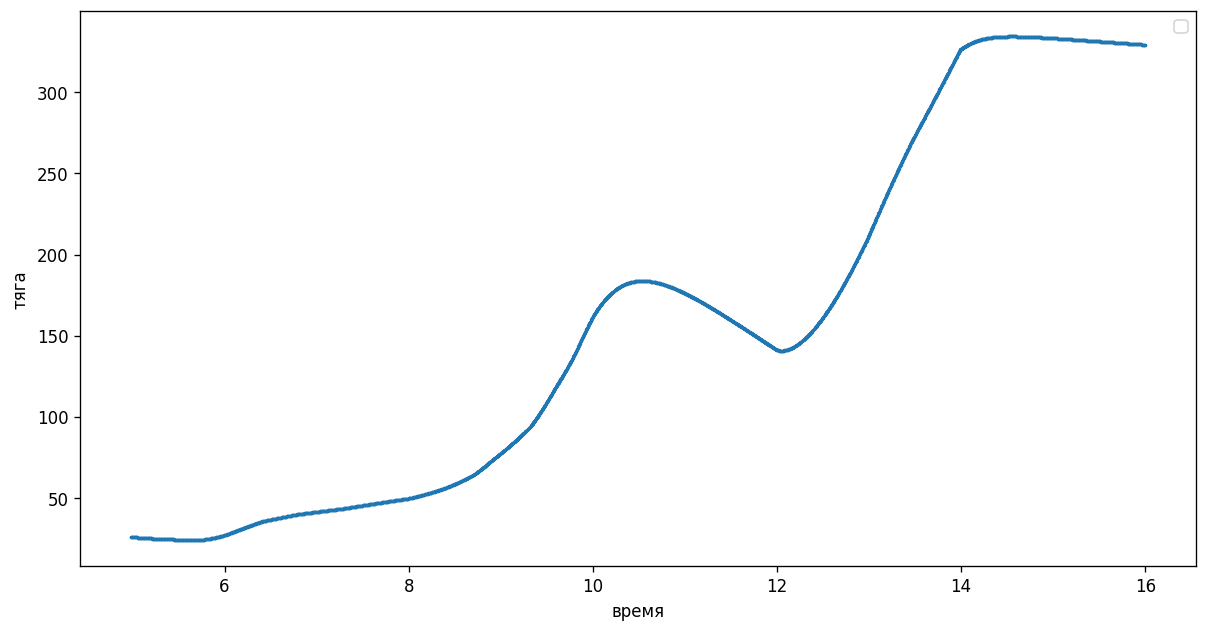

In [6]:
plt.figure(figsize=(12, 6), dpi=120)
plt.scatter(time,thrust,s=1)
plt.xlabel('время')
plt.ylabel('тяга')
plt.title(f'')
plt.legend()
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_17608\3839193718.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


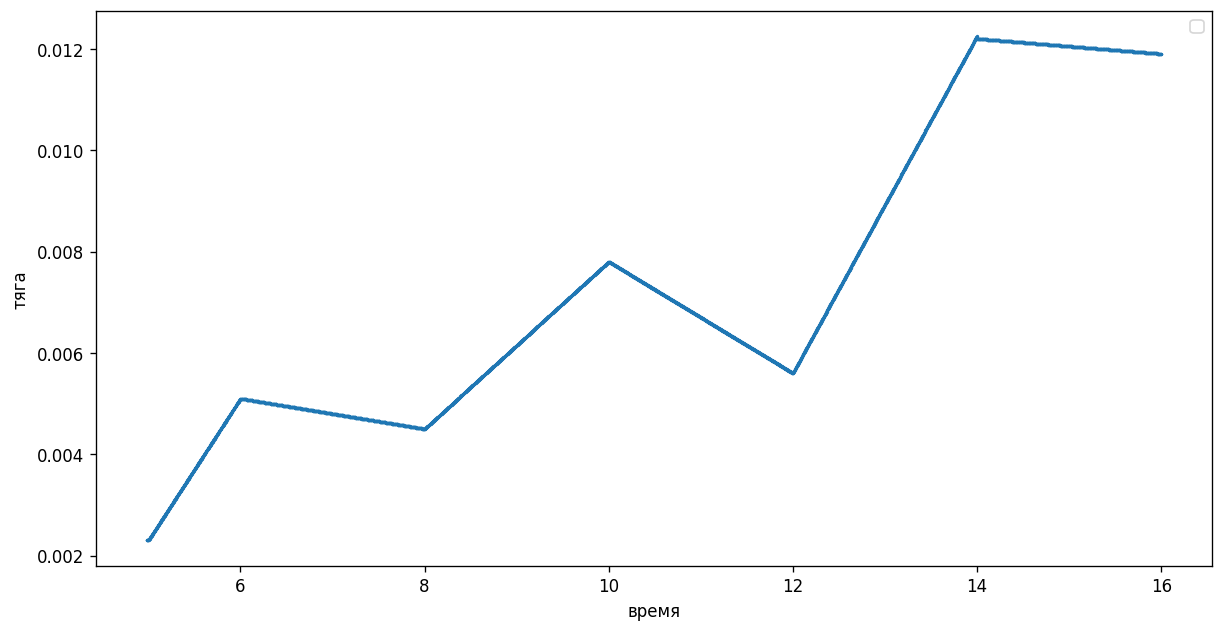

In [14]:
plt.figure(figsize=(12, 6), dpi=120)
plt.scatter(time,supply,s=1)
plt.xlabel('время')
plt.ylabel('тяга')
plt.title(f'')
plt.legend()
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_17608\3186014253.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


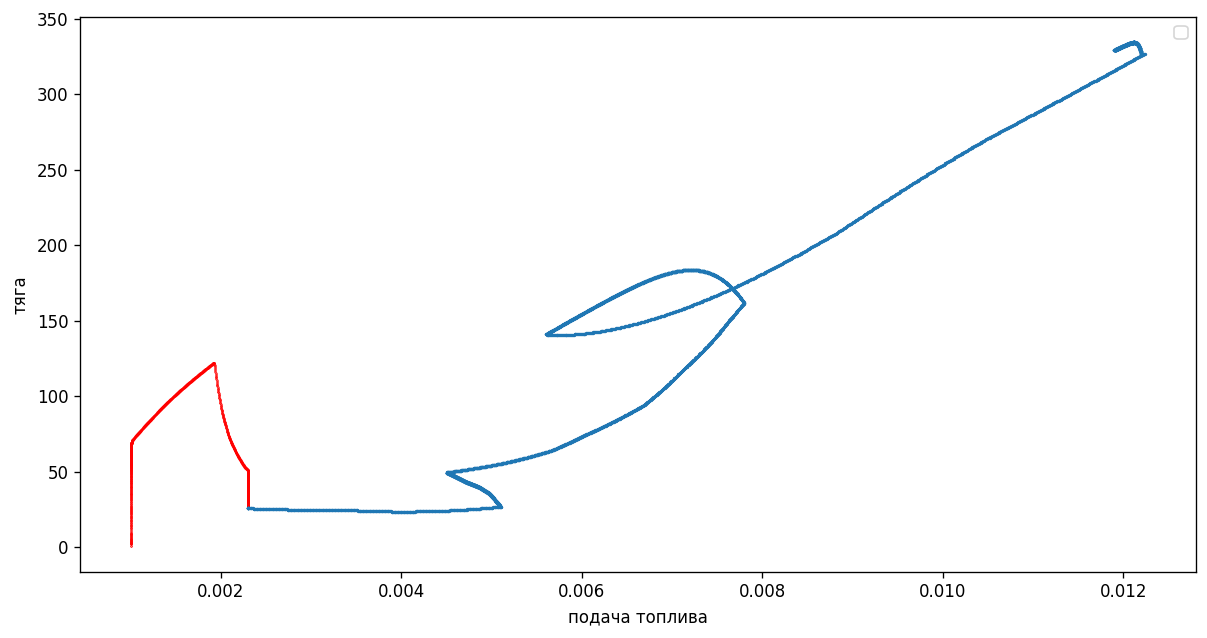

In [7]:
plt.figure(figsize=(12, 6), dpi=120)
plt.scatter(a_supply,a_thrust,s=0.1,color = 'r')
plt.scatter(supply,thrust,s=1)
plt.xlabel('подача топлива')
plt.ylabel('тяга')
plt.title(f'')
plt.legend()
plt.show()

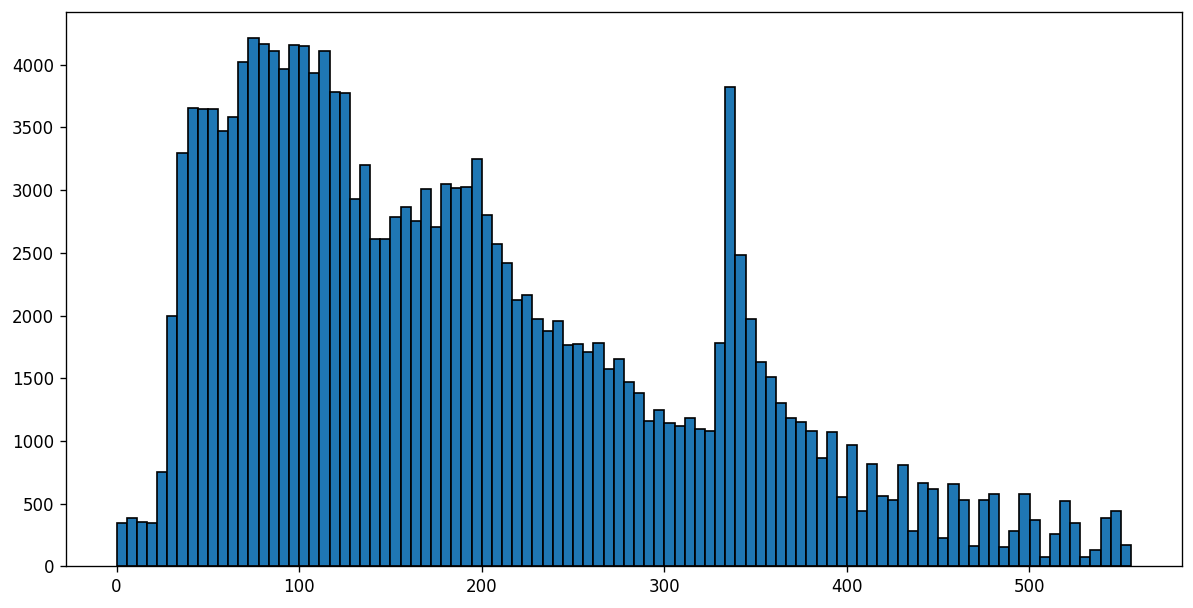

In [14]:
plt.figure(figsize=(12, 6), dpi=120)
plt.hist(data, bins=100, edgecolor='black')  
plt.show() 

In [27]:
#tr = torch.exp(torch.log(1+data)/(torch.sqrt(data)))
mn = torch.mean(data)
temp = (-np.power(data+mn*1.5,5)-1)/(-2-1e12)
tr = np.log(1 + temp)*100/np.power(temp,.3)
tr = np.exp(tr / mn * 10)
# mn = torch.mean(tr)
# temp = (-np.power(tr+mn,5)-1)/(-2-1e12)
# tr = np.log(1 + temp)*100/np.power(temp,.7)


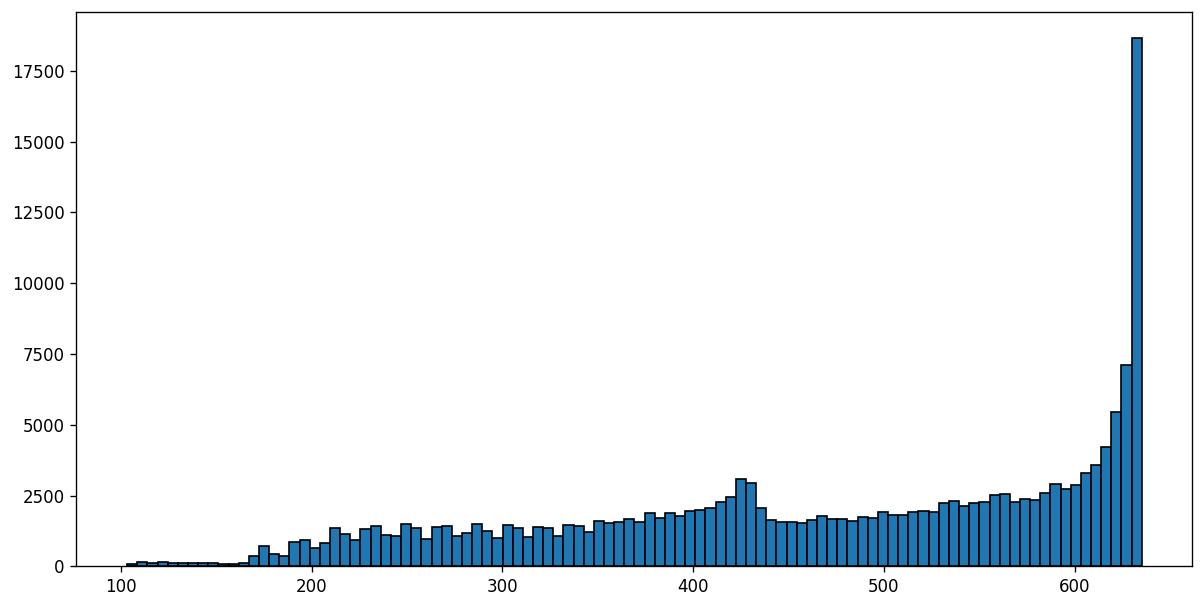

In [28]:
plt.figure(figsize=(12, 6), dpi=120)
plt.hist(tr, bins=100, edgecolor='black')  
plt.xlabel('')  
plt.ylabel('')  
plt.title('')  
plt.show() 

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame([[1,1,1],[1,1,1],[1,2,2],[2,2,2]])
y  = torch.log(1+torch.tensor(df.iloc[:,-1]))

In [10]:
y.shape,df.shape

(torch.Size([4]), (4, 3))

In [1]:
from sklearn.preprocessing import RobustScaler

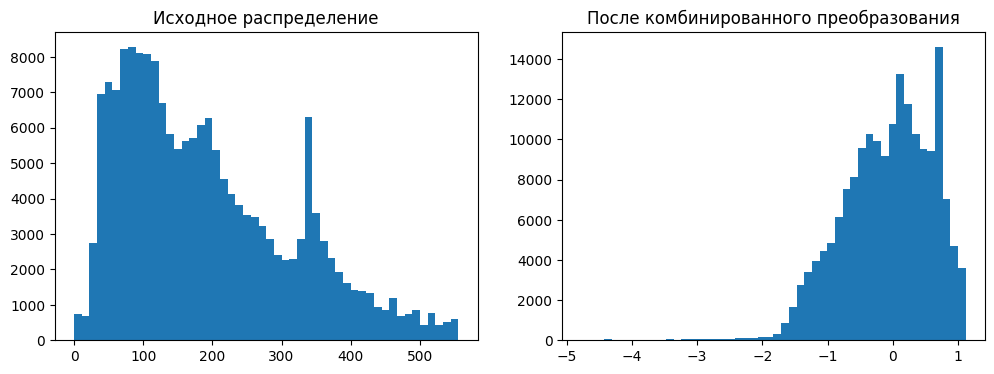

In [11]:
log_data = np.log1p(data)
scaler = RobustScaler()
transformed_data = scaler.fit_transform(log_data.reshape(-1, 1))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(data, bins=50)
plt.title('Исходное распределение')
plt.subplot(122)
plt.hist(transformed_data, bins=50)
plt.title('После комбинированного преобразования')
plt.show()